In [1]:
import pandas as pd
import os 
import sys
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px
root_dir = os.path.abspath('..') 
sys.path.append(root_dir)  
# from src.visualization import exploration

# Breweries exploration

In [3]:
new_df_breweries = pd.read_csv("../generated/data/new_breweries.csv")

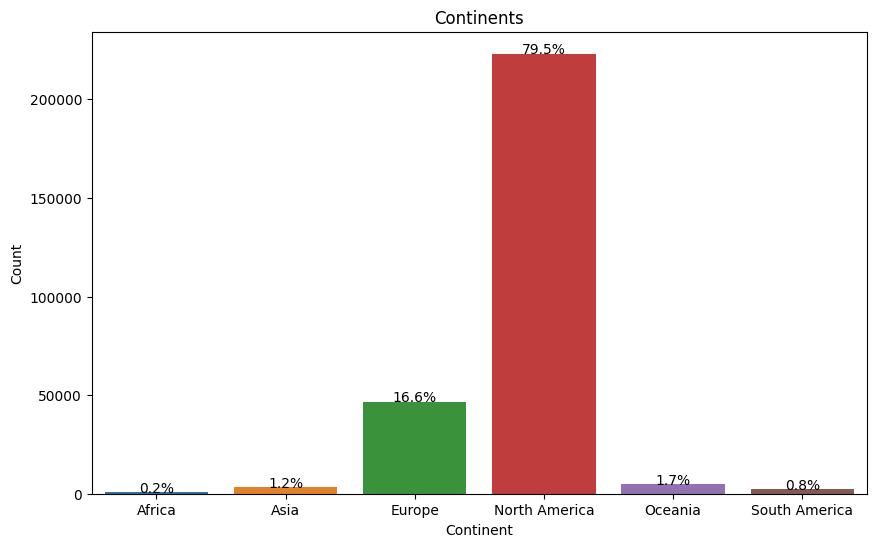

In [82]:
# Computation of percentages of continents
continent_counts = new_df_beers["continent"].value_counts().sort_index()
total_count = continent_counts.sum()
continent_percentages = (continent_counts / total_count) * 100

# DataFrame for the plot
plot_df = pd.DataFrame({
    'Continent': continent_counts.index,
    'Count': continent_counts.values,
    'Percentage': continent_percentages.values
})

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Count
sns.barplot(
    x='Continent', y='Count', data=plot_df, ax=ax, color='orange', label="Count", palette="tab10", hue="Continent"
)

# Percentages
for index, row in plot_df.iterrows():
    ax.text(index, row['Count'], f"{row['Percentage']:.1f}%", color='black', ha="center")

# Titles 
ax.set_title("Continents")
ax.set_ylabel("Count")
ax.set_xlabel("Continent");

# Ratings and beers exploration

In [5]:
new_df_ratings = pd.read_csv("../generated/data/new_ratings.csv")
new_df_beers = pd.read_csv("../generated/data/new_beers.csv")

In [6]:
model = smf.ols("rating ~ appearance + aroma + palate + taste + overall - 1", new_df_ratings, ).fit()
display(model.summary())
print("Sum of parameters : ", model.params.sum())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.368e+11
Date:                Sat, 09 Nov 2024   Prob (F-statistic):                        0.00
Time:                        10:30:01   Log-Likelihood:                      3.0148e+06
No. Observations:              628427   AIC:                                 -6.030e+06
Df Residuals:                  628422   BIC:                                 -6.030e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
appearance     0.0601   5.19e-06   1.16e+04      0.000       0.060       0.060
aroma          0.2401    6.2e-06   3.87e+04      0.000       0.240       0.240
palate         0.1001    6.8e-06   1.47e+04      0.000       0.100       0.100
taste          0.4002   8.15e-06   4.91e+04      0.000       0.400       0.400
overall        0.1997   7.92e-06   2.52e+04      0.000       0.200       0.200
==============================================================================
Omnibus:                   129050.083   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229216.148
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       3.231   Cond. No.                         33.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sum of parameters :  1.0002715597770524


# Par type et continent

In [7]:
new_df_ratings.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].agg({"rating":["mean","sem"]}).reset_index()

continent        type    rating          
                                   mean       sem
0          Africa         Ale  3.449818  0.043309
1          Africa       Lager  2.830405  0.018311
2          Africa       Other  3.242308  0.092692
3          Africa     Pilsner  3.302206  0.078367
4          Africa       Stout  3.411256  0.041033
5          Africa  Wheat Beer  3.546190  0.058923
6            Asia         Ale  3.697482  0.007966
7            Asia       Lager  2.789692  0.004697
8            Asia       Other  3.408293  0.015525
9            Asia     Pilsner  3.191262  0.015595
10           Asia       Stout  3.755873  0.009103
11           Asia  Wheat Beer  3.882838  0.010620
12         Europe         Ale  3.712443  0.001412
13         Europe       Lager  3.231507  0.002422
14         Europe       Other  3.832375  0.002285
15         Europe     Pilsner  3.390165  0.003225
16         Europe       Stout  3.937353  0.001929
17         Europe  Wheat Beer  3.974278  0.001957
18  North America         Ale  3.864638  0.001882
19  North America       Lager  2.798288  0.003302
20  North America       Other  3.526071  0.003899
21  North America     Pilsner  3.432483  0.007416
22  North America       Stout  4.039763  0.003352
23  North America  Wheat Beer  3.675690  0.004594
24        Oceania         Ale  3.512955  0.005277
25        Oceania       Lager  2.682667  0.008439
26        Oceania       Other  3.434138  0.014259
27        Oceania     Pilsner  3.429945  0.016462
28        Oceania       Stout  3.778525  0.008615
29        Oceania  Wheat Beer  3.350057  0.015209
30  South America         Ale  3.571355  0.012127
31  South America       Lager  2.801230  0.012872
32  South America       Other  3.429714  0.013991
33  South America     Pilsner  2.922781  0.022076
34  South America       Stout  3.682689  0.018578
35  South America  Wheat Beer  3.513219  0.019057

In [9]:
fig = px.bar(
    new_df_ratings.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].mean().reset_index(),
    x="type",
    y="rating",
    facet_row="continent",
    color="continent",
    title="Ratings Per Continent",
    error_y="rating"
)

fig.update_yaxes(range=[3, 5])

fig.update_yaxes(title_text="Continent", matches="y", showticklabels=True)

fig.update_layout(
    title={'text': "Ratings Per Continent", 'x': 0.5, 'xanchor': 'center'},
    margin=dict(t=50),
    showlegend=False
)

# fig.show()
fig.write_html("../generated/figures/style_continent_rating.html")

In [11]:
new_df_ratings

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,continent,type
0,0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,20/08/2015,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,Africa,Lager
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,20/02/2009,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,Europe,Ale
2,2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,13/03/2006,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,Europe,Ale
3,3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,01/12/2004,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True,Europe,Ale
4,4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,30/08/2004,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,Europe,Ale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,MattyG85,mattyg85.497925,4.50,4.50,4.50,4.50,4.5,4.50,Poured from 500 ml bottle into a Surly Darknes...,True,Europe,Stout
999996,999996,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,ThinkAgain,thinkagain.640802,NaN,NaN,NaN,NaN,NaN,4.50,NaN,False,Europe,Stout
999997,999997,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,Kartoffeln,kartoffeln.571639,5.00,4.00,4.50,4.00,4.5,4.21,A: Pours an opaque black with a mocha head of ...,True,Europe,Stout
999998,999998,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,kelvarnsen,kelvarnsen.639972,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False,Europe,Stout


# Calcul avg_computed

In [29]:
new_df_beers[new_df_beers['beer_id'] == 19590]

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,continent,type
24,24,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845,NaN,0,NaN,Europe,Ale


In [81]:
new_df_ratings.loc[new_df_ratings['beer_id'] == 19590,"rating"]

1    3.67
2    3.73
3    3.98
4    4.00
Name: rating, dtype: float64

In [80]:
new_df_ratings.loc[new_df_ratings['beer_id'] == 19590,["appearance","aroma","palate","taste","overall","rating"]]

,appearance,aroma,palate,taste,overall,rating
1,3.0,3.5,3.5,4.0,3.5,3.67
2,4.0,3.5,3.5,4.0,3.5,3.73
3,4.0,3.5,4.0,4.0,4.5,3.98
4,4.0,4.0,4.0,4.0,4.0,4.00


In [75]:
(np.mean(new_df_ratings.loc[new_df_ratings['beer_id'] == 19590,["appearance","aroma","palate","taste","overall"]].values,0) *  model.params.values).sum()

3.846003986648621

In [72]:
new_df_beers

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,continent,type
0,0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Asia,Lager
1,1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Asia,Lager
2,2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Asia,Lager
3,3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Asia,Lager
4,4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Asia,Lager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN,North America,NaN
280819,280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN,North America,Ale
280820,280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,North America,NaN
280821,280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN,North America,NaN


In [2]:
rb_users = pd.read_csv("../data/processed/new_rb_users.csv")

In [14]:
rb_users.country.value_counts() / rb_users.country.value_counts().sum()

country
United States       0.530815
Canada              0.064338
England             0.054040
Poland              0.033622
Australia           0.029175
                      ...   
Honduras            0.000020
Falkland Islands    0.000020
Kyrgyzstan          0.000020
Papua New Guinea    0.000020
Tibet               0.000020
Name: count, Length: 173, dtype: float64

In [11]:
ba_users = pd.read_csv("../data/processed/new_ba_users.csv")

In [16]:
ba_users.country.value_counts() / ba_users.country.value_counts().sum()

country
United States                               0.924836
Canada                                      0.027151
England                                     0.006461
Australia                                   0.004247
Germany                                     0.003039
                                              ...   
South Georgia and South Sandwich Islands    0.000008
Angola                                      0.000008
Kazakhstan                                  0.000008
Egypt                                       0.000008
Sint Maarten                                0.000008
Name: count, Length: 145, dtype: float64